Step 1:Load and Inspect Your Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# 1. Load Data
file_name = 'preprocessed_stress_level_dataset.csv'
df = pd.read_csv(file_name)

# 2. Define Features (X) and Target (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']
class_names = [f'Class {c}' for c in sorted(y.unique())]

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}\n")

Training set: (880, 12), Test set: (220, 12)



Step 2: Helper Function to Evaluate Models

In [21]:
# Helper function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    print(f"--- Evaluation for: {model_name} ---")

    # Get predictions
    y_pred = model.predict(X_test)

    # 1. Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"1. Accuracy: {accuracy:.4f}")

    # 2. Classification Report
    print("\n2. Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # 3. Confusion Matrix
    print("\n3. Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show() # Display the plot

    print("--------------------------------------------------\n")
    return accuracy

Step 3: Train and Evaluate 3 KNN Variations

--- Evaluation for: Variation 1: KNN (k=3) ---
1. Accuracy: 0.8818

2. Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.85      0.86        74
     Class 1       0.97      0.90      0.94        72
     Class 2       0.81      0.89      0.85        74

    accuracy                           0.88       220
   macro avg       0.89      0.88      0.88       220
weighted avg       0.89      0.88      0.88       220


3. Confusion Matrix:


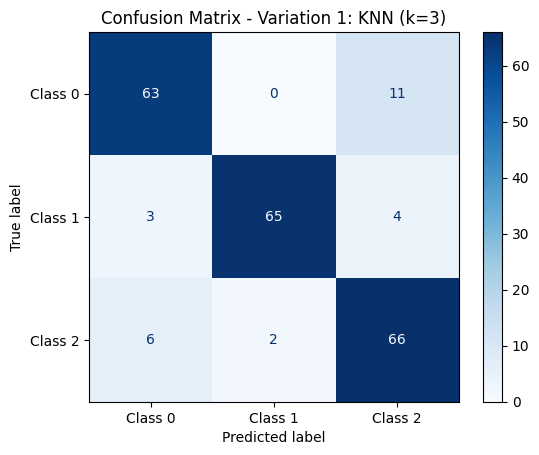

--------------------------------------------------

--- Evaluation for: Variation 2: KNN (k=5) ---
1. Accuracy: 0.9000

2. Classification Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.88      0.88        74
     Class 1       0.93      0.93      0.93        72
     Class 2       0.88      0.89      0.89        74

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220


3. Confusion Matrix:


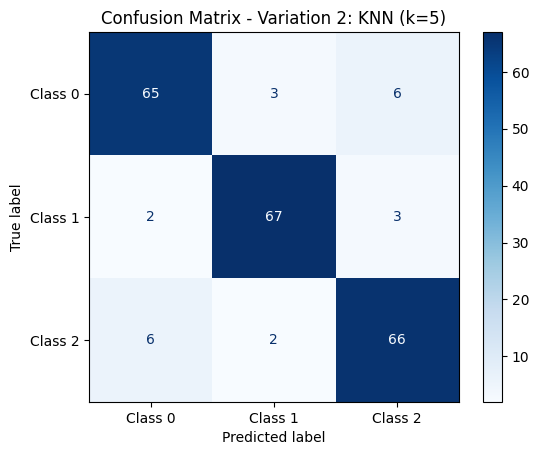

--------------------------------------------------

--- Evaluation for: Variation 3: KNN (k=3, weights='distance') ---
1. Accuracy: 0.8773

2. Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.81      0.85        74
     Class 1       0.94      0.90      0.92        72
     Class 2       0.81      0.92      0.86        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220


3. Confusion Matrix:


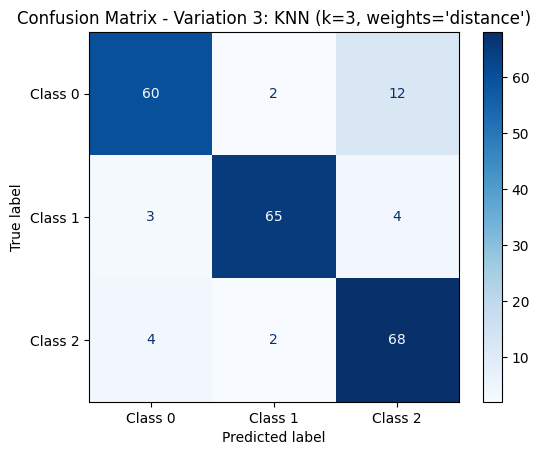

--------------------------------------------------



In [22]:
# To store results for final comparison
model_accuracies = {}

# --- Variation 1: KNN (k=3, uniform weights) ---
# This was the 'best_k' you found in your other notebook
model_1 = KNeighborsClassifier(n_neighbors=3)
model_1.fit(X_train, y_train)
acc1 = evaluate_model(model_1, X_test, y_test, "Variation 1: KNN (k=3)")
model_accuracies["KNN (k=3)"] = acc1

# --- Variation 2: KNN (k=5, uniform weights) ---
# This was the 'initial_knn' you used in your other notebook
model_2 = KNeighborsClassifier(n_neighbors=5)
model_2.fit(X_train, y_train)
acc2 = evaluate_model(model_2, X_test, y_test, "Variation 2: KNN (k=5)")
model_accuracies["KNN (k=5)"] = acc2

# --- Variation 3: KNN (k=3, distance weights) ---
# This is a new variation that weights points by distance
model_3 = KNeighborsClassifier(n_neighbors=3, weights='distance')
model_3.fit(X_train, y_train)
acc3 = evaluate_model(model_3, X_test, y_test, "Variation 3: KNN (k=3, weights='distance')")
model_accuracies["KNN (k=3, distance)"] = acc3

Step 4: Final Comparison

In [23]:
# --- Final Comparison ---

print("\n--- Final Model Accuracy Comparison ---")
# Convert the dictionary to a pandas Series for easy printing
accuracy_summary = pd.Series(model_accuracies).sort_values(ascending=False)
print(accuracy_summary)


--- Final Model Accuracy Comparison ---
KNN (k=5)              0.900000
KNN (k=3)              0.881818
KNN (k=3, distance)    0.877273
dtype: float64
